# Heart Disease Prediction using SVM

### Objective : 
Develop a machine learning model to predict the presence or absence of heart disease in individuals using Support Vector Machines (SVM) for both linear and non-linear scenarios.



### 1- Data Exploration:

- [Download](https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci/data) the Heart Disease UCI dataset from Kaggle.
- Explore the dataset to understand its structure and characteristics.
- Check for missing values and perform any necessary data cleaning.

In [1]:
#import libreries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import  matplotlib.pyplot as plt
import missingno as msno 


from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



import plot_distribution as cust_plot 


import warnings
warnings.filterwarnings('ignore')  # to avoud warnings

- Explore the dataset to understand its structure and characteristics.

In [2]:
df = pd.read_csv("Datasets/HeartDisease.csv")
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [3]:
#Convert into DataFrame 
df = pd.DataFrame(df)

In [4]:
#shape
df.shape

(1025, 14)

In [5]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [6]:
#Data types 
df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [7]:
#Data type distribution 
df.dtypes.value_counts()

object     8
int64      5
float64    1
Name: count, dtype: int64

In [8]:
#Brief stat 
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


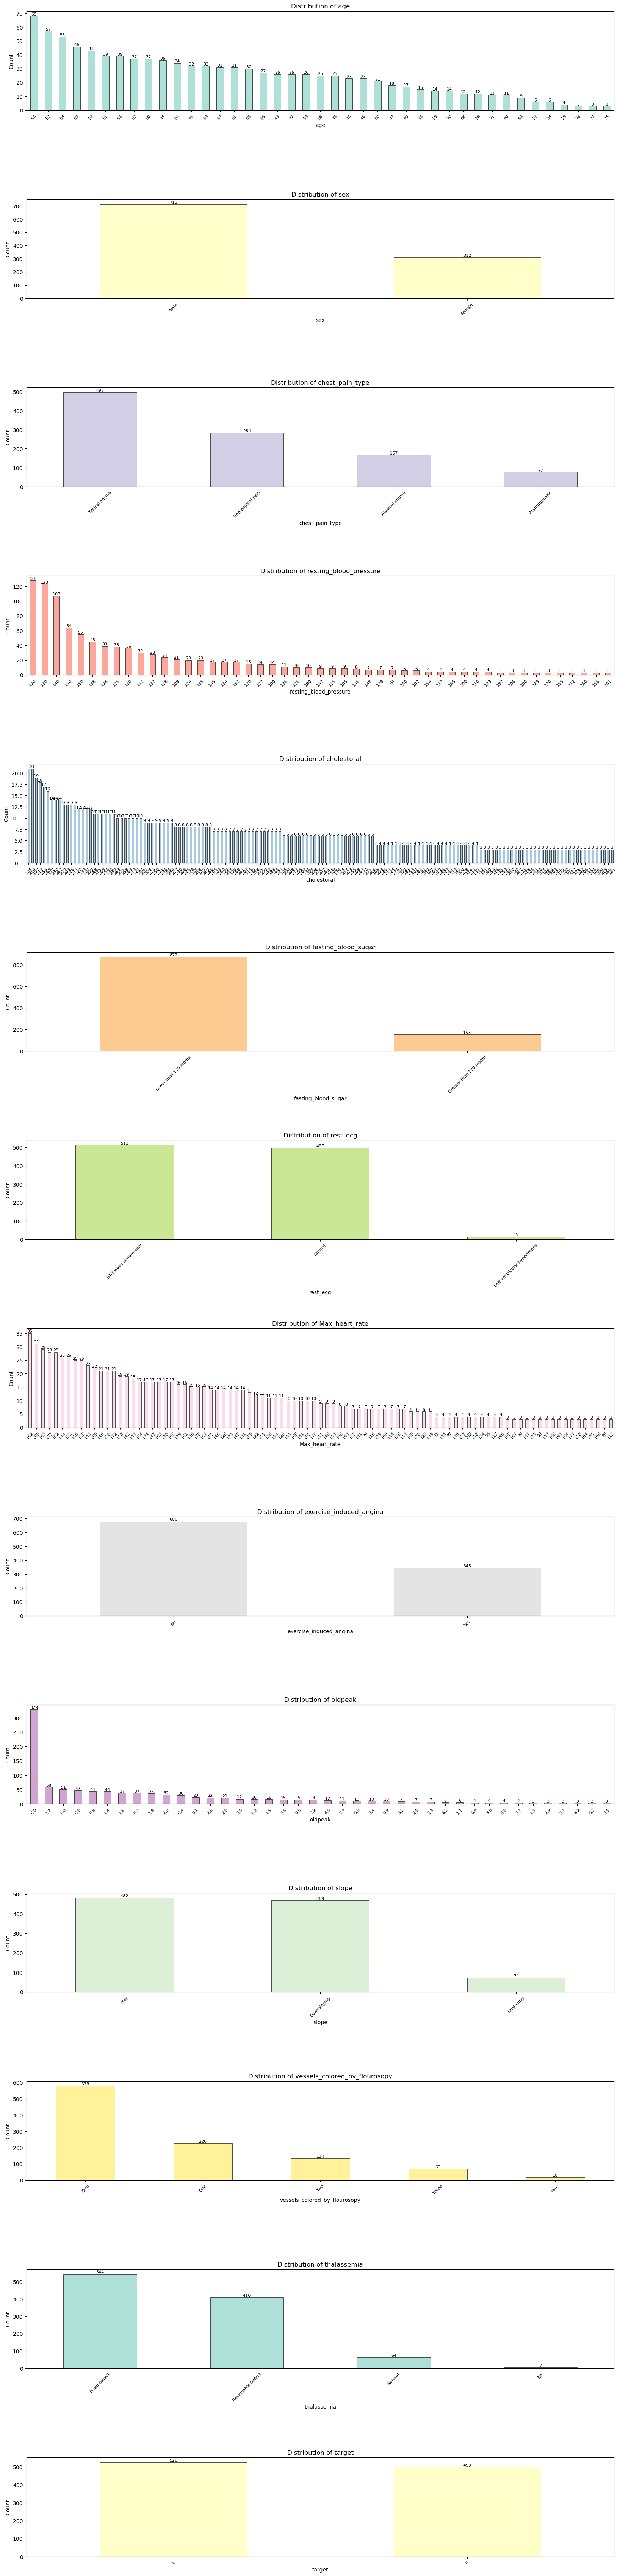

In [9]:
#Value overview distribution 

cust_plot.plot_column_distributions(df)

- Check for missing values and perform any necessary data cleaning.

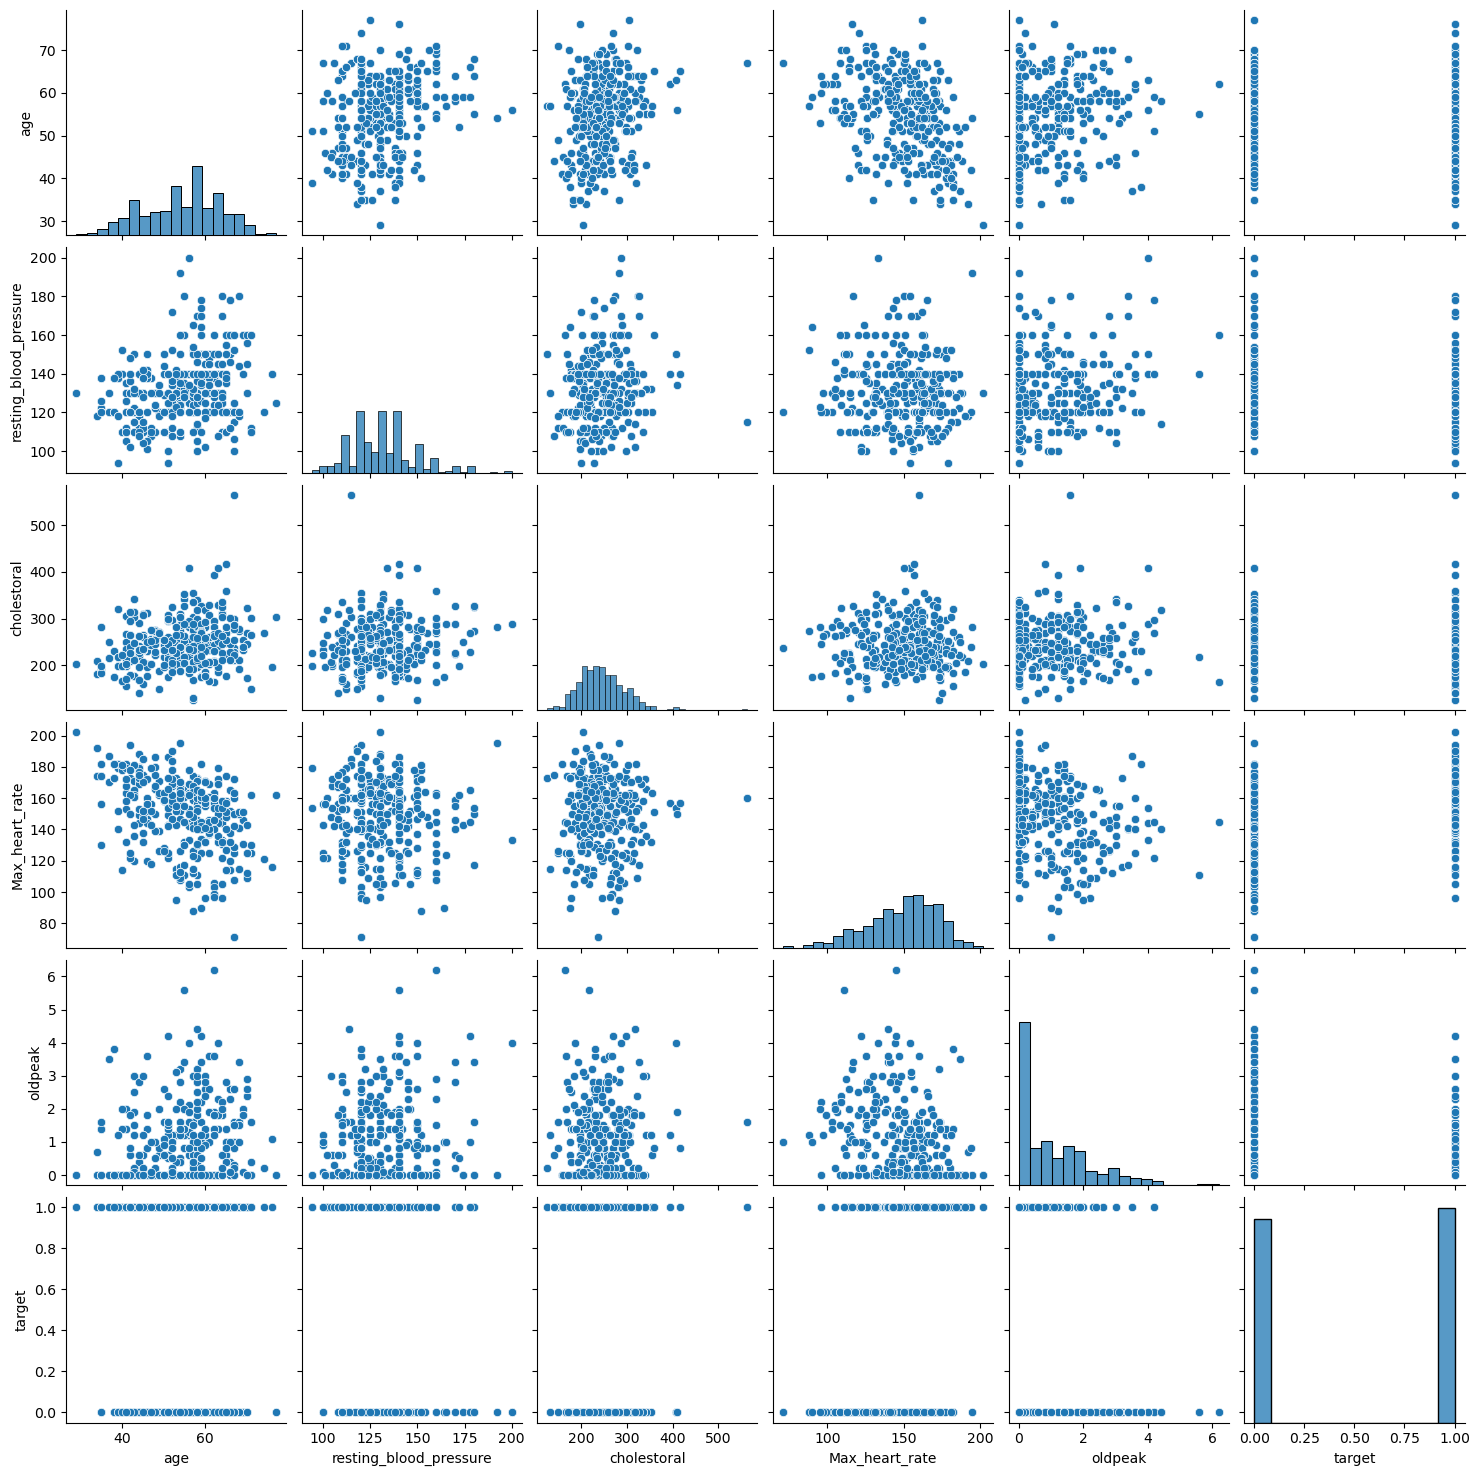

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
#Check and count missing values 

df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

<Axes: >

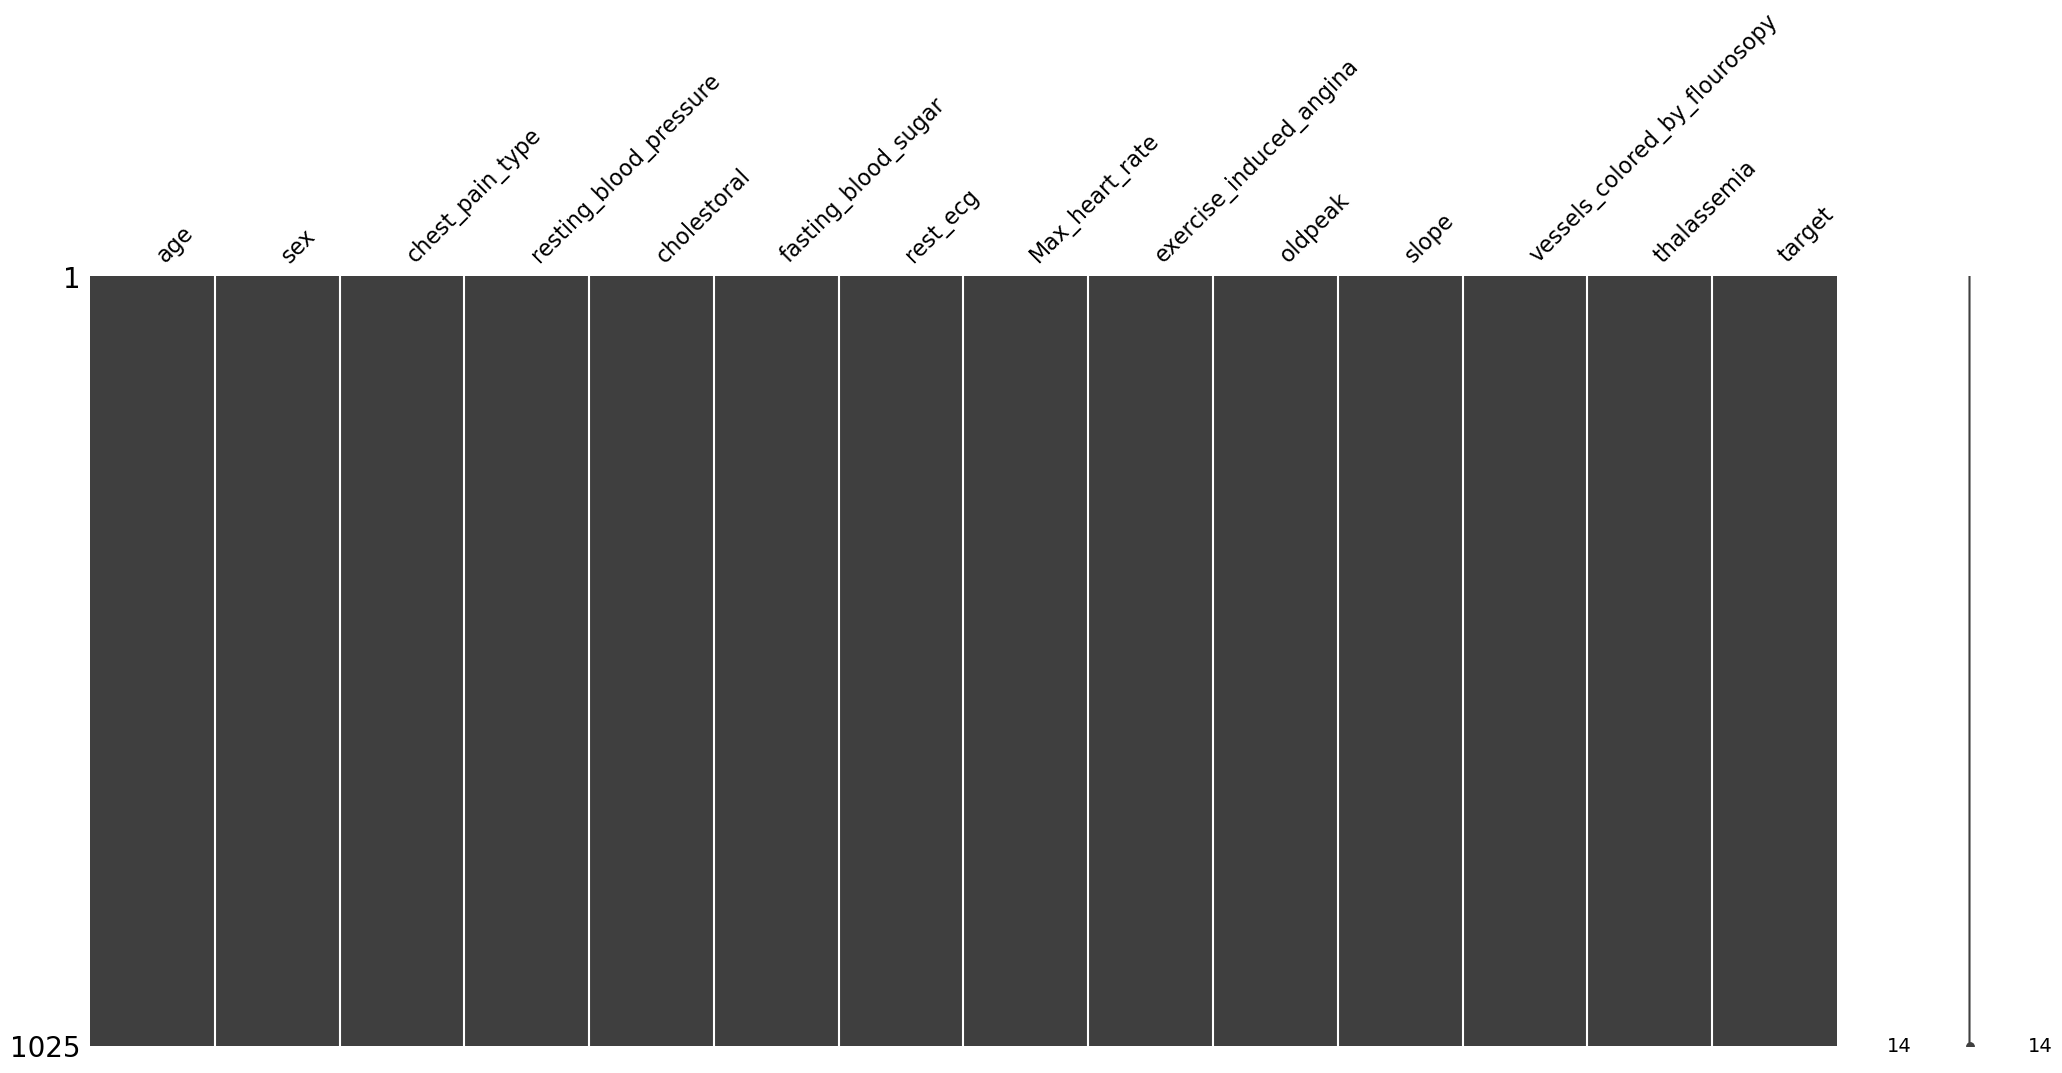

In [12]:
#mising values Viz

msno.matrix(df)

**Non missing values in Dataset** 

- Separe features adn targets 

In [13]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [14]:
# Separate target and features

y = df["target"]               #Target
X = df.drop("target", axis=1)  #Features

###  2- Preprocessing : 

- Handle categorical features through one-hot encoding or other suitable methods.
- Standardize or normalize numerical features.
- Split the dataset into training and testing sets.
----------------------------


- Handle categorical features through one-hot encoding or other suitable methods.

In [15]:
#Assing X to df for better manipulation 
df = X 

In [16]:
#Separe numerical and categoricals variables 
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

numerical_df = df[numerical_columns]
categorical_df = df[categorical_columns]

In [17]:
numerical_df.head()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [18]:
categorical_df.head()

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
0,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,Two,Reversable Defect
1,Male,Typical angina,Greater than 120 mg/ml,Normal,Yes,Upsloping,Zero,Reversable Defect
2,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,Yes,Upsloping,Zero,Reversable Defect
3,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,One,Reversable Defect
4,Female,Typical angina,Greater than 120 mg/ml,ST-T wave abnormality,No,Flat,Three,Fixed Defect


- Data Nomalisation and encoding 

In [19]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
                            ('scaler', MinMaxScaler())
                        ])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply transformations to the entire DataFrame
X_transformed = preprocessor.fit_transform(df)

# Get transformed column names
transformed_column_names = numerical_columns.tolist() + \
                           preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns).tolist()

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(X_transformed, columns=transformed_column_names)

In [20]:
# Example usage:
print("Transformed DataFrame:")
transformed_df.head()

Transformed DataFrame:


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Female,sex_Male,chest_pain_type_Asymptomatic,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,...,slope_Upsloping,vessels_colored_by_flourosopy_Four,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,0.479167,0.292453,0.196347,0.740458,0.161290,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.500000,0.433962,0.175799,0.641221,0.500000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.854167,0.481132,0.109589,0.412214,0.419355,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.666667,0.509434,0.175799,0.687023,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.687500,0.415094,0.383562,0.267176,0.306452,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


- Split the dataset into training and testing sets

In [21]:
#Split dataset into Train and test 

X_train , X_test , y_train , y_test = train_test_split(transformed_df,y, test_size=0.3 , random_state=42)

In [22]:
#train shape 

X_train.shape , X_test.shape

((717, 30), (308, 30))

In [23]:
#Test shape 

y_train.shape , y_test.shape

((717,), (308,))

### 3- Linear SVM:  :

- Implement a linear SVM classifier using a library like Scikit-Learn.
- Train the model on the training data.
- Evaluate the model on the testing data and report accuracy.
---------------------

- Implement a linear SVM classifier using a library like Scikit-Learn.

In [24]:
#Create a linear SVM model

Lin_SVM = svm.SVC(kernel='linear')

#Train the model on the training set

Lin_SVM.fit(X_train,y_train)

#predictions on the test set 

y_pred_Lin = Lin_SVM.predict(X_test)


In [25]:
# show the kerner hwe used 

Lin_SVM.kernel

'linear'

- Train the model on the training data.

In [26]:
#Print predicted values : y_pred_Lin

print("Linear SVM Predictions:\n\n",y_pred_Lin)

Linear SVM Predictions:

 [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1
 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 0 0 1]


In [27]:
#Model prediction 

print("Predict the 4 firsts vectors of features:\n\n ",Lin_SVM.predict(X_test[:4]))

Predict the 4 firsts vectors of features:

  [1 1 0 1]


- Evaluate the model on the testing data and report accuracy.

In [28]:
# model evaluation Linear SVM

accuracy = accuracy_score(y_test, y_pred_Lin)
print(f"Accuracy , Linear SVM : {accuracy * 100:.2f}%")

Accuracy , Linear SVM : 81.17%


### 4- Non-linear SVM:

- Implement a non-linear SVM using a kernel trick, such as the Radial Basis Function (RBF) kernel.
- Train the model on the training data.
- Evaluate the model on the testing data and compare the results with the linear SVM.
-----

- Implement a non-linear SVM using a kernel trick, such as the Radial Basis Function (RBF) kernel.


In [29]:
#Define the non linear model using 'rbf' Kernel 

Non_Lin_SVM_rbf = svm.SVC(kernel='rbf')

 - Train the model on the training data.


In [30]:
Non_Lin_SVM_rbf.fit(X_train , y_train)

SVC()

In [31]:
#Thre kernel 

Non_Lin_SVM_rbf.kernel

'rbf'

In [32]:
#Predic 

y_pred_rbf = Non_Lin_SVM_rbf.predict(X_test)

In [33]:
#Display Predict 

y_pred_rbf

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [34]:
#Predict the firt 4 vectors 

Non_Lin_SVM_rbf.predict(X_test[:4])

array([1, 1, 0, 1])

- valuate the model on the testing data and compare the results with the linear SVM

In [35]:
# model evaluation NON Linear SVM ( sbf)

accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy , NON Linear SVM ( rbf )  : {accuracy * 100:.2f}%")

Accuracy , NON Linear SVM ( rbf )  : 90.26%


. Confusion matrix for non linear svm 

-  **Linear and non Linear SVM comparis :** 
    
    In our case, it is evident that the accuracy of the RBF SVM surpasses that of the Linear SVM. This discrepancy suggests the presence of a non-linear decision boundary in our data, where the RBF kernel excels in capturing complex relationships, leading to improved accuracy

### SVM Comparison: Linear vs RBF

| Feature                            | Linear SVM                            | RBF SVM                                |
|------------------------------------|---------------------------------------|----------------------------------------|
| **Kernel Function**                | Linear                                | Radial Basis Function (RBF)           |
| **Decision Boundary**              | Linear (straight line)                | Non-linear (curved/complex)            |
| **Applicability**                  | Suitable for linearly separable data | Suitable for non-linearly separable data|
| **Computational Complexity**       | Lower                               | Higher                                |
| **Parameter Sensitivity**          | Less sensitive to parameter tuning   | More sensitive to parameter tuning     |
| **Performance on Outliers**        | Sensitive (may be affected by outliers)| Robust (better handling of outliers)  |
| **Interpretability**               | Easier to interpret                  | More complex to interpret              |
| **Training Time**                  | Faster                               | Slower                                |
| **Use Cases**                      | Simple data structures               | Complex, non-linear relationships      |



### 5- Hyperparameter Tuning:

- Fine-tune the hyperparameters of the SVM models to achieve better performance.
- Experiment with different values for regularization parameters and kernel parameters.
_____

- Fine-tune the hyperparameters of the SVM models to achieve better performance.


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
}

svm_model = Non_Lin_SVM_rbf

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

y_pred_rbf_tuned = grid_search.predict(X_test)

# Calculate accuracy with the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_rbf_tuned)
print(f"Accuracy, Tuned NON Linear SVM (RBF): {accuracy_tuned * 100:.2f}%")

Best Parameters: {'C': 100, 'gamma': 1}
Accuracy, Tuned NON Linear SVM (RBF): 99.03%


- Non Linear model tunning 

In [37]:
#Define the new model 

vm_model_tuned = SVC(kernel='rbf', C=100, gamma=1)

In [38]:
#Train  the new model 

vm_model_tuned.fit(X_train,y_train)

SVC(C=100, gamma=1)

In [39]:
# predic 

y_pred_tuned = vm_model_tuned.predict(X_test)

- Evaluate the new model tuned 

In [40]:
#Display accuracy tuned 

accuracy_tuned = accuracy_score(y_test, y_pred_rbf_tuned)
print(f"Accuracy, Tuned NON Linear SVM (RBF): {accuracy_tuned * 100:.2f}%")

Accuracy, Tuned NON Linear SVM (RBF): 99.03%


- Experiment with different values for regularization parameters and kernel parameters.

The model exhibits its peak performance when fine-tuned with the hyperparameters set to **C=100**, **gamma=1**, and utilizing the radial basis function **(RBF)** kernel. These parameter values have been identified as optimal for maximizing the model's effectiveness.

### 6 - Performance Metrics:

Use appropriate performance metrics such as accuracy, precision, recall, and F1 score to evaluate the models.


In [55]:
#Use the custum plot metric funtion

- Model : Tuned SDF SVM ( Non Linear )

Performance metrics for model:

Accuracy: 99.03%
Precision: 100.00%
Recall: 97.99%
F1 Score: 98.98%

Confusion Matrix:


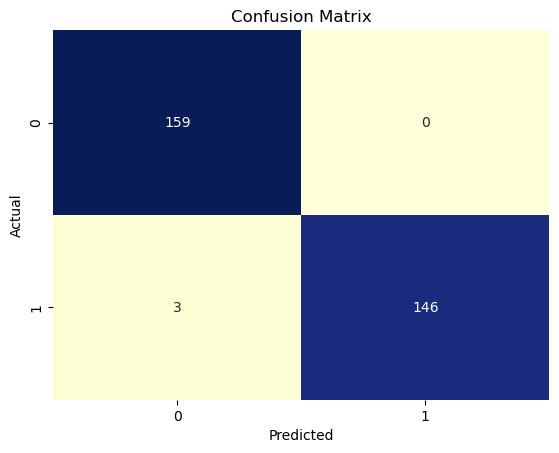


Additional Metrics:
Accuracy: 99.03%


In [58]:
print("- Model : Tuned SDF SVM ( Non Linear )\n" )

cust_plot.evaluate_and_plot_performance(y_test, y_pred_rbf_tuned, class_labels=np.unique(y))

- Model : SDF SVM ( Non Linear )

- Model :  LINEAR SVM 

Performance metrics for model:

Accuracy: 81.17%
Precision: 77.91%
Recall: 85.23%
F1 Score: 81.41%

Confusion Matrix:


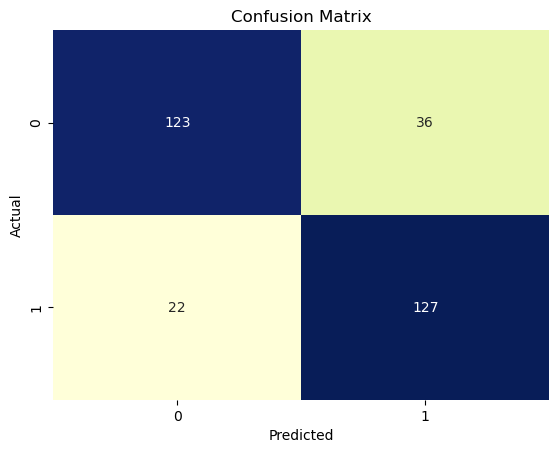


Additional Metrics:
Accuracy: 81.17%


In [60]:
print("- Model : SDF SVM ( Non Linear )\n" )

print("- Model :  LINEAR SVM \n" )

cust_plot.evaluate_and_plot_performance(y_test, y_pred_Lin, class_labels=np.unique(y))

- Model : SDF SVM ( Non Linear )

- Model :  LINEAR SVM 

Performance metrics for model:

Accuracy: 81.17%
Precision: 77.91%
Recall: 85.23%
F1 Score: 81.41%

Confusion Matrix:


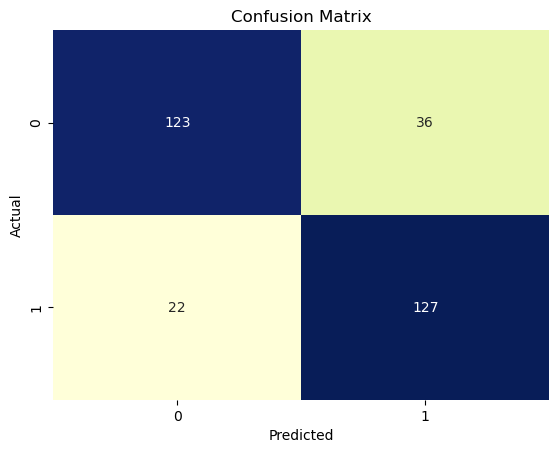


Additional Metrics:
Accuracy: 81.17%


In [60]:
print("- Model : SDF SVM ( Non Linear )\n" )

print("- Model :  LINEAR SVM \n" )

cust_plot.evaluate_and_plot_performance(y_test, y_pred_Lin, class_labels=np.unique(y))

### 5- Visualization (optional):

Depending on the dimensionality of the dataset, you may consider visualizing decision boundaries or feature importance.
